In [402]:
#conda install conda-forge::pyfai
#pip install datastorage
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit
import importlib

import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
#%matplotlib widget
import sys

import sys
sys.path.append('../SCRIPTS/XPCS_library/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorrelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

# RAW FOLDER PATH
raw_folder = '../RAW_DATA/'
masks_folder = '../masks/'
pilatus_mask = np.load(masks_folder+"pilatus300k_mask_20240201.npy")
ponifile = masks_folder+"lab6_eh2_exp_0001_scan0027.poni"

# EXPERIMENTAL VARIABLES
XPCS.set_expvar(1350, 1400, 7)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

## LOAD EXAMPLE DATA

In [403]:
#######################################
sample_name = 'GeO2_7_730C'
Ndataset = 1
Nscan =4
Nfi, Nff =  0, 1000
#######################################
scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
for k in scan.keys(): print(f"{k} -> {scan[k]} ;")

pilatus_data = ID10.load_pilatus(raw_folder, sample_name, Ndataset, Nscan, Nfi=0, Nff=300, Nstep=1)

command -> mtimescan 0.001 1 14399568 ;
start_time -> 2025-04-11T18:20:09.217610+02:00 ;
end_time -> 2025-04-11T18:47:12.828606+02:00 ;
fast_timer_trig -> [1.0000000e-03 2.1000000e-03 3.2000000e-03 ... 1.6099489e+03 1.6099500e+03
 1.6099511e+03] ;
fast_timer_period -> [0.0011 0.0011 0.0011 ... 0.0011 0.0011 0.0011] ;
slow_timer_trig -> [1.0000000e-03 1.0042000e+00 2.0074000e+00 ... 1.6061242e+03 1.6071274e+03
 1.6081306e+03] ;
slow_timer_period -> [1.0032 1.0032 1.0032 ... 1.0032 1.0032 1.0032] ;
monoe -> 9.699998837562536 ;
delcoup -> 1.7500000000000004 ;
ys -> -0.27 ;
zs -> 0.120000000000001 ;
omega_sample -> [730. 730. 730. ... 730. 730. 730.] ;
omega_body -> [380. 380. 380. ... 380. 380. 380.] ;
epoch -> [1.74438841e+09 1.74438841e+09 1.74438841e+09 ... 1.74439002e+09
 1.74439002e+09 1.74439002e+09] ;


## PLOT SINGLE PILATUS IMAGE

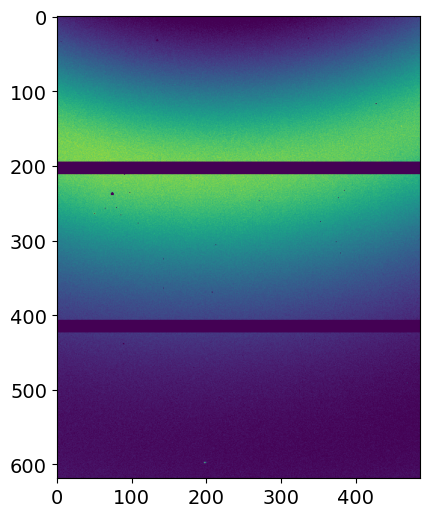

In [404]:
plt.figure(figsize=(10, 6))
plt.imshow(pilatus_data[16], vmin=1400, vmax=4000)

## COMPUTE THE SQ

In [405]:
q, Sq, dSq = XPCS.get_Sq(pilatus_data, ponifile=ponifile, mask=pilatus_mask)

Computing azimuthal integration...


100%|██████████| 300/300 [00:02<00:00, 106.75it/s]

Done! (elapsed time = 2.81 s)


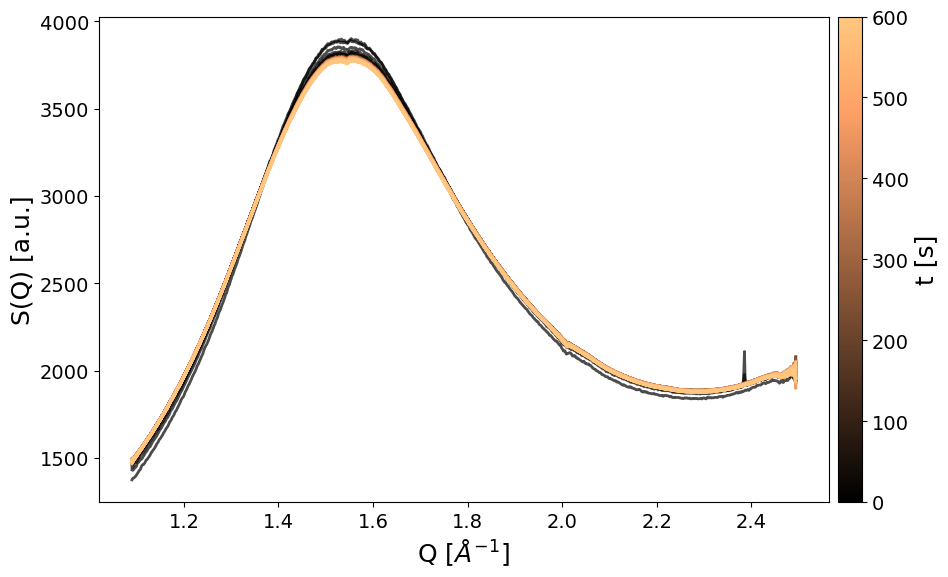

In [406]:
XPCS.plot_Sq(q, Sq, itime=2, )